# Hierarhical Agglomerative Clustering - Codealong

## Introduction

In this codealong, we'll work through a code-along to to observe how Hierarchical Agglomerative Clustering works by examining various visualizations at each step of the algorithm. 

## Objectives

You will be able to:

* Demonstrate an understanding of how the Hierarchical Agglomerative Clustering (HAC) algorithm finds clusters
* Compare and contrast K-Means and HAC methodologies
* Create and interpret a dendrogram using HAC

## Getting Started

In this codealong, we'll create a sample dataset, and then use HAC and observe the decisions it makes at each step as it identifies and merges similar clusters at each step. 

To get started, we need to create a dataset. Let's start by running the cell below to import everything we'll need for this kmeans_lab_for_testing.ipynb. 

In [1]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
import pandas as pd
%matplotlib inline  

To understand how hierarchical clustering works, we'll look at a data set with 16 data points that belong to 3 clusters. 

Run the cell below to create and visualize this dataset. As with the dataset we created in our K-Means lab, our visualization will use different colors to differentiate between each different cluster created. 

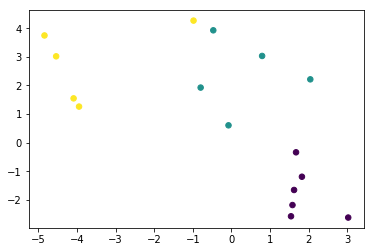

In [3]:
k = 3
m = 16
X, y = make_blobs(n_samples= m, n_features=2, centers=k, cluster_std=1.3)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 30);

Nexts, we'll use `AgglomerativeClustering` with one parameter `n_clusters=3` to run the algorithm. Not specifying a linkage function will lead to the usage of the `wald` linkage criterion.

Run the cell below. This cell will:

1. Create an `AgglomerativeClustering` object and set the number of clusters it will stop at at 3.
2. Fit the clustering object to the data and then assign predictions for each point. 
3. Visualize the data, with the color signifying the predictions made by our clustering algorithm. 

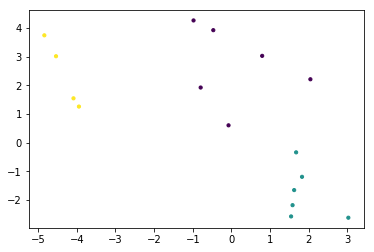

In [4]:
agg_clust = AgglomerativeClustering(n_clusters=3)
agg_clust
assigned_clust = agg_clust.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = assigned_clust, s = 10);

As you can see the algorithm did pretty well. It got a couple points wrong, but the ones it got wrong seem pretty reasonable, in that they are very close to other clusters. 

## Visualizing How HAC Works

Just like K-Means Clustering, using the HAC algorithm to make cluster predictions on a dataset certainly seems simple enough, thanks to the simplicity of scikit-learn's API. However, for this time, we'd like to get a better look at exactly what is happening during each step of the algorithm.  To do this, we'll borrow some code from the book "Introduction to Machine Learning with Python", by Andreas Müller and Sarah Guido--Andreas is the core contributor to scikit-learn, and the book Sarah and he created contains many great examples of how each algorithm works. In this case, they created several functions that we'll use to visualize the propagation of Agglomerative clustering algorithms (among others). We slightly adapted these functions and stored them in two `.py`-files in the course repository. 

The functions can be found here: https://github.com/amueller/mglearn/tree/master/mglearn

First, import `plot_agglomerative_agorithm` from `plot_agg_alg`. You can obtain the plot by just running `plot_agglomerative_algorithm()`.

In [ ]:
from plot_agg_alg import plot_agglomerative_algorithm

In [ ]:
plot_agglomerative_algorithm()

This very informative graph shows every step of the linkage (note that the dataset in the pictures is not the one we created above). In the very first step, each data point represents one cluster. Then in every step, 2 clusters (with cluster meaning either a single data point or a cluster of points that has been created in a previous step) that are closest are merged.
Note that `plot_agglomerative_algorithm()` actually even goes beyond the specified endpoint of 3 clusters and shows what the result would be if we'd have 2 clusters too. 

Next, let's  import `plot_agglomerative` from `plot_agg` and run this function as well. This function gives us another view on the clustering technique, as it shows an overlay of all possible clusterings shown in Figure `plot_agglomerative_algorithm`. This way, it creates an overview of how each cluster breaks up into smaller clusters.

In [ ]:
from plot_agg import plot_agglomerative #file in the repo

In [ ]:
plot_agglomerative()

When you have real data and not intentionally generated clusters, these visualizations are very useful to identify whether you actually selected the right value for $k$. However, if you have more than just 2 features, visualizing becomes tricky. A 3D plot is still feasible, but you won't be able do this when you have more than 3 features. A very helpful visualization technique is creationg _dendrograms_. Let's create one in the next section.

## Dendrograms

Unfortunately, `scikit-learn` doesn't provide the functionality to create dendrograms. Luckily though, you can easily create them using `SciPy`. In fact, SciPy provides algorithms for more linkage criteria than `Scikit-learn` does. A full overview can be found here: https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy.

When you install `ward` from `scipy.cluster.hierarchy`, what Scipy does is it takes the data array `X` and it computes a linkage array, which encodes hierarchical cluster similarities. Feeding this array into the `dendrogram` function, dendrograms can be created!

Run the cell below to create a **_Dendrogram_** visualization. 

In [ ]:
from scipy.cluster.hierarchy import dendrogram, ward

# use the ward() function
linkage_array = ward(X)

# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [16, 16], '--', c='k')
ax.plot(bounds, [9, 9], '--', c='k')
ax.text(bounds[1], 16, ' 2 clusters', va='center', fontdict={'size': 12})
ax.text(bounds[1], 9, ' 3 clusters', va='center', fontdict={'size': 12})
plt.xlabel("Data index")
plt.ylabel("Cluster distance")

So how to interpret this dendrogram? At the very bottom of the dendrogram, the data points are represented as individual cluster. Moving up, first clusters start to form, starting with data points 12 and 15, and next data points 2 and 6, next 4 and 5, etc, until all the clusters are merged together. This along with the plot created trough `plot_agglomerative()` gives basically a complete view of how clusters are created using the ward algorithm. 


Let's look at the y-axis next. the length of how far each branch is apart also shows how far apart the merged clusters are. If branches to go from k to k-1 clusters are very long, it means that the merged clusters are far apart. It might then make sense to stick to k clusters!

## 3. Going back to the 6 cluster data set

Let's generate a dataset like the one we created for our K-Means Clustering and apply Hierarchical Clustering there.

Run the cell below to create and visualize the sample dataset.

In [ ]:
k = 6
m = 400
X, y = make_blobs(n_samples= m, n_features=2, centers=k, cluster_std=0.8,  random_state = 1234)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 10);

Now, we'll create 3 different versions of the HAC algorithm, and see how different linkage setting affect the performance of each. 

Run the cell below to create thse objects, fit each to the dataset we created, and generate predictions from each. 

In [ ]:
agg_comp = AgglomerativeClustering(linkage ="complete", n_clusters=6)
agg_avg = AgglomerativeClustering(linkage ="average", n_clusters=6)
agg_ward = AgglomerativeClustering(linkage ="ward", n_clusters=6)

as_comp = agg_comp.fit_predict(X)
as_avg = agg_avg.fit_predict(X)
as_ward = agg_ward.fit_predict(X)

Let's start by visualizing the predictions made by the model using `'linkage=complete'`:

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = as_comp, s = 10);

Now, `linkage='average'`:

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = as_avg, s = 10);

And finally, `linkage='ward'`:

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = as_ward, s = 10);

The results look all pretty similar, except for some small differences in the two upper left clusters. 

Now, let's look at the dendrogram for the ward cluster.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, ward
linkage_array = ward(X)

# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
plt.xlabel("Sample index")
plt.ylabel("Cluster distance");

We have 400 cases here, which makes the dendrogram look messy. We're mostly interested in in the last few clusters anyways. Let's truncate the diagram to make it more interpretable and see how it looks. 

In [ ]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
dendrogram(linkage_array,  truncate_mode='lastp', p=12)
plt.xlabel('cluster size')
plt.ylabel('distance')
plt.show()

## Evaluation

Now let’s run a k-means clustering algorithm and compare its performance to the hierarchical clustering algorithms.

In [ ]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters = 6)
k_means.fit(X)
y_hat = k_means.predict(X)

plt.scatter(X[:, 0], X[:, 1], c = y_hat, s = 10)
cl_centers = k_means.cluster_centers_
plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='black', s=40);

We have ran 4 algorithms in total now, all stored as follows:

`k_means`, `agg_comp`, `agg_avg`, `agg_ward`

By using `.labels` on each of them, you get the array with associated cluster labels. Because we generated the data, we can actually compare these with the actual cluster labels, stored in `y`.

In [ ]:
labels_kmeans = k_means.labels_
labels_comp = agg_comp.labels_
labels_avg = agg_avg.labels_
labels_ward = agg_ward.labels_

Note that for each algorithm, the same cluster, let's say on the upper left, might be labeled differently--in some, it might be cluster "1", while in other instances, cluster "3". Luckily, the evaluation algorithms in scikit-learn take this into account, so we can go ahead and compare them without worrying about it. 

We've already seen one or two of these metrics before--let's take this opportunity to quickly see some other metrics that can be used to evaluate cluster fitness, as well. 

Run the cells below to see how each of the four algorithms we fit to the data compare.

**_NOTE:_** Don't worry about memorizing each of these metrics--just be aware that they exist. It's better to pick one (such as Variance Ratio), and use it reliably. You'll likely only break out the other metrics for special cases, or when you want a second opinion, as opposed to just going with the metric you usually use!

## Adjusted Rand Index

The [Adjusted Rand Index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html) computes a similarity measure between two different clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters predicted, and the true clusterings, before adjusting for random chance. Note that the true labels must be known for this metric to be used. 

The Adjusted Rand Index is bounded between -1 and 1. Closer to 1 is good, while closer to -1 is bad. 

In [ ]:
from sklearn import metrics

In [ ]:
metrics.adjusted_rand_score(labels_kmeans, y)  

In [ ]:
metrics.adjusted_rand_score(labels_ward, y)

In [ ]:
metrics.adjusted_rand_score(labels_avg, y)  

In [ ]:
metrics.adjusted_rand_score(labels_comp, y)  

## Fowlkes-Mallows score

The [Fowlkes-Mallows Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fowlkes_mallows_score.html) measures the similarity fo two clusterings as a set of points by calculating teh geometric mean between precision and recall. Note that the true labels must be known for this metric to be used. 

This score is bounded between 0 and 1. Closer to 1 is better.

In [ ]:
metrics.fowlkes_mallows_score(labels_kmeans, y)  

In [ ]:
metrics.fowlkes_mallows_score(labels_ward, y)

In [ ]:
metrics.fowlkes_mallows_score(labels_avg, y)  

In [ ]:
metrics.fowlkes_mallows_score(labels_comp, y)  

## Calinski-Harabaz Index

The [Calinski-Harabaz Index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabaz_score.html) is a variance ratio measurement which measures the ratio between within-cluster dispersion and between-cluster dispersion. You'll often hear this metric referred to simple as "Variance Ratio". 

This score is not bounded. The higher, the better. 

In [ ]:
metrics.calinski_harabaz_score(X, labels_kmeans)  

In [ ]:
metrics.calinski_harabaz_score(X,labels_ward)

In [ ]:
metrics.calinski_harabaz_score(X,labels_avg)  

In [ ]:
metrics.calinski_harabaz_score(X,labels_comp)  

## Silhouette Coefficient

Finally, [Silhouette Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) is calculated using the mean intra-cluster distance, as well as the mean distance to the nearest cluster for each sample in the dataset. Note that the function below returns the mean Silhouette Score for all samples, but you can also use it to get the Silhouette Coefficient for a single point, in case you want to judge the fitness of a single point in a cluster. 

This metric is bounded at -1 and 1. Closer to -1 suggests incorrect clustering, while closer to +1 shows that each cluster is very dense. 

In [ ]:
metrics.silhouette_score(X, labels_kmeans)

In [ ]:
metrics.silhouette_score(X, labels_ward) 

In [ ]:
metrics.silhouette_score(X,labels_avg)  

In [ ]:
metrics.silhouette_score(X, labels_comp)  

## Summary

In this codealong, we learned how to create, fit, and interpret results for Hierarchical Agglomerative Clustering algorithms! We took a look at the decisions taken by the algorithm at each step to merge similar clusters, compared results for 3 different linkage criteria, and even created and interpreted a Dendrogram of results!